# simple example of VBGMM(Variational Bayesian Gaussian Mixture Model)

[[ 1.06713517  0.30799331]
 [ 1.57849364  0.4302287 ]
 [ 1.57847724  0.43015884]
 ..., 
 [ 1.84686783  0.65489306]
 [ 1.84702608  0.65489976]
 [ 1.84701372  0.65489362]]


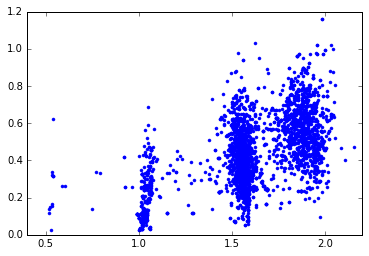

In [69]:
from __future__ import print_function
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
1. data preparation
"""
def load_data():
    """
    read data from     Maeda_carbon8_descriptor.csv
    
    @return : 2D p.array
    """
    df = pd.read_csv("Maeda_carbon8_descriptor.csv",index_col = [0,1])
    """
    use columns ["a0.5_rp1.5","a0.5_rp2.5"]
    """
    X = df[["a0.5_rp1.5","a0.5_rp2.5"]].as_matrix()
    print(X)
    """
    make 2D array

    plot raw data
    """
    plt.plot(X[:,0],X[:,1],".")
    plt.show()
    return X
X = load_data()

In [70]:
"""

3. data analysis

"""
import sklearn.mixture
def analyze_X(X, n_max):
    """
    clustering
    """
    
    clf =  sklearn.mixture.BayesianGaussianMixture(n_components=n_max, random_state=6,max_iter=10000)
    clf.fit(X)
    
    y = clf.predict(X) 
    n_clusters = clf.n_components
    
#    print(y.shape)
#    print (y)
#    print(distortion)
    return y, n_clusters, clf

n_max=6
y, n_clusters, clf = analyze_X(X, n_max)


In [71]:
y
import collections
def howmany(y):
    """
    check the number of labels 
    """
    counter = collections.Counter(y)
    print(counter)
    
howmany(y)

Counter({2: 1517, 0: 1141, 1: 330, 5: 217, 4: 180, 3: 175})


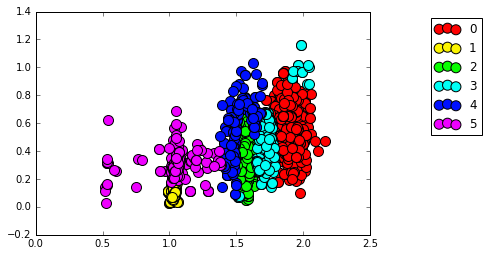

In [72]:
"""
4. visualization
"""
import matplotlib.cm as cm
import numpy as np

def plot_result(X,y,n_clusters):
    """
    plot them with different colors corresponding to cluster ids
    """
    
    for i in range(n_clusters):
        xx = []
        for x,y1 in zip(X,y):
            if y1 == i:
                xx.append(x)
#        print(xx)
        xx = np.array(xx)
        plt.scatter(xx[:,0],xx[:,1],color=cm.hsv(i/float(n_clusters)),marker='o',label=str(i),
                    edgecolors="black",s=100,)

    plt.legend(loc='upper right', bbox_to_anchor=(1.35,1.0))
    plt.show()

plot_result(X,y,n_clusters)


<function matplotlib.pyplot.show>

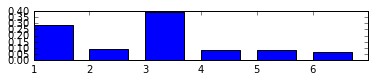

In [73]:
# 解説9: クラスター数の確率結果をプロット-----------------------------------------------
#print(vbgm.weights_)
plt.subplot(4, 1,4)
x_tick =np.array(range(1,n_clusters+1))
plt.bar(x_tick, clf.weights_, width=0.7, tick_label=x_tick)
plt.show

## エルボー法

In [68]:
distortions = []
n_c=50

for i in range(1,n_c):
    y,distortion,cluster_centers = analyze_X(X,i)
    distortions.append(distortion)

plt.plot(range(1,n_c),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.yscale("log")
plt.show()

KeyboardInterrupt: 